In [1]:
import gudhi
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import gudhi.representations

In [ ]:
def nodesExtractor(name): #extracts nodes and their corresponding information
    file_path = 'Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['nodesC2']
    # Reshape or ensure it's a proper 2D array (if required)
    nodes_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    nodes_df = pd.DataFrame(nodes_data, columns=['NodeID', 'X', 'Y', 'Z', 'Degree'])
    # Save the DataFrame to inspect it
    return nodes_df

def nodesToArray(name):
    nodes_df = nodesExtractor(name)
    nodes_loc = nodes_df.loc[:,['X','Y','Z']]/1000 # puts coordinates into millimeters
    loc_array = nodes_loc.to_numpy()
    return loc_array

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

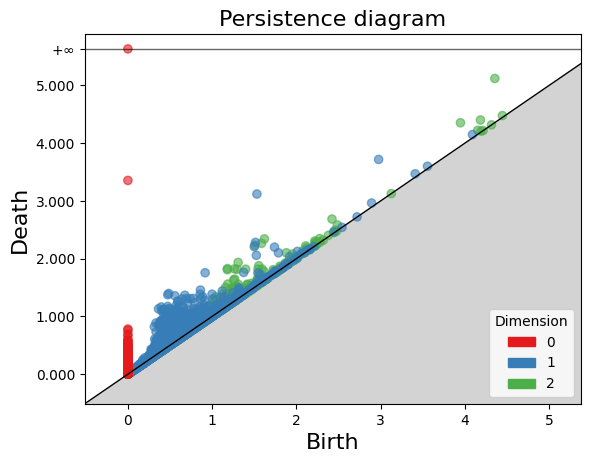

In [22]:
# prints persistence diagram
point_loc = nodesToArray('m3p4_060407') #pull in nodes

alpha_complex = gudhi.AlphaComplex(points = point_loc)

alpha_stree = alpha_complex.create_simplex_tree()

alpha_stree.compute_persistence()

gudhi.plot_persistence_diagram(alpha_stree.persistence())

my current question is about the red dot that diees around 3.5. The longest vessel in the network is around 5. The most remote node in the network (the root node) is 4.56 mm away from the nearest node, so I'm really confused how that dot is populating. This issue persists across networks so I'm just trying to understand if I am doing something incorrectly in the process of creating the simplex tree.

Text(0.5, 1.0, 'Persistence Image')

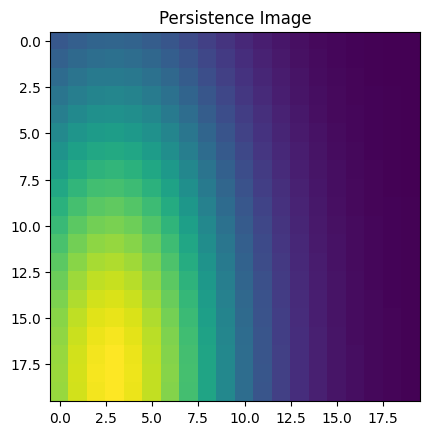

In [20]:
## Print persistence image for dimension 1 and 2, can't do 0 right now because infinity
PI = gudhi.representations.PersistenceImage()
pi = PI.fit_transform([alpha_stree.persistence_intervals_in_dimension(1)])
plt.imshow(np.flip(np.reshape(pi[0],[20,20]),0))
plt.title('Persistence Image')